# Housing Trends in London

## Introduction

London is the capital of England. It is an appealing destination for many; whether it is for tourism purposes or for relocation. There are a lot of opportunities in various fields such as business, fashion, arts, tourism, and higher education. London is very diverse, both in terms of culture and economic background. London has 32 boroughs and the City of London district. The boroughs are very different from one other. They all have different qualities that they are famous for. Some have a better nightlife, some have better historical architures, some have better touristic spots and so on. 

For people wanting to live in London, deciding which borough to live in is an important decision. In this project, I will explore factors such as home prices, crimes in neighborhoods, homesales, and use visualizations and analysis to discover interesting findings about the London boroughs. 


In [1]:
# Importing packages required for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

I will next read the datafiles into a dataframe using pandas. There is one main file that that I will be using is housing_in_london_monthly_variables: I will read this to a dataframe called monthly.

I will try to do some additional analysis with this file: housing_in_london_yearly_variables: I will read this to a dataframe called yearly.


In [2]:
monthly = pd.read_csv('../Downloads/econ 803 datafiles/housing_in_london_monthly_variables.csv')
yearly = pd.read_csv('../Downloads/econ 803 datafiles/housing_in_london_yearly_variables.csv')

I will first begin working with the monthly dataframe. The monthly dataset has 13549 rows and 7 columns

In [3]:
# getting more info about dataframe.
monthly.info()
monthly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


We can see that the date has been stored as an object. I will convert it to a pandas datetime object and split the year and month into a separate column to get better details.

In [4]:
monthly['date'] = pd.to_datetime(monthly['date'], format= '%Y-%m-%d')

monthly['month'] = pd.to_datetime(monthly['date']).dt.month
monthly['year'] = pd.to_datetime(monthly['date']).dt.year

monthly.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,month,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1,2,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1,3,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1,4,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1,5,1995


In [5]:
# Finding null values
monthly.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
month               0
year                0
dtype: int64

In [6]:
# We can see that there are 94 null values in the houses_sold column and no_of_crimes column. 
# Let's see what percentage of null values we have.
round(monthly.isnull().mean()*100,2)

date              0.00
area              0.00
average_price     0.00
code              0.00
houses_sold       0.69
no_of_crimes     45.10
borough_flag      0.00
month             0.00
year              0.00
dtype: float64

While 45.1% of null values is a very high percentage, I will keep the no_of_crimes column as I want to analyze and see if we what information we can get about the crime rates in the boroughs.

In [7]:
monthly.describe()

,average_price,houses_sold,no_of_crimes,borough_flag,month,year
count,1.354900e+04,13455.000000,7439.000000,13549.000000,13549.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338,6.480700,2007.040224
std,1.876175e+05,12114.402476,902.087742,0.442230,3.460991,7.239151
min,4.072200e+04,2.000000,0.000000,0.000000,1.000000,1995.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000,3.000000,2001.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000,6.000000,2007.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000,9.000000,2013.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000,12.000000,2020.000000


In [8]:
# Filling null values with the mean.
crimes_mean = monthly['no_of_crimes'].mean()
monthly.fillna(value = crimes_mean, inplace=True)

houses_sold_mean = monthly['houses_sold'].mean()
monthly.fillna(value = houses_sold_mean, inplace=True)


In [9]:
# dropping irrelevant column
monthly = monthly.drop(columns='code')

Now let's see what information we can get from the data about the boroughs. We have the area column which seems to have the boroughs. Let's look at what values we have in the column.

In [10]:
#Finding unique values from the area column
monthly.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [11]:
#Number of unique values in area column
len(pd.unique(monthly['area']))

45

It seems that this column contains more locations than just the boroughs. There are 45 unique values when there should be 33. We see that there are values like "east of england" that are not boroughs. We need to separate out the boroughs from the column as the main goal of this project is to analyze the housing market in only the boroughs of London, and not the rest of England. We can see that there is a borough_flag column containing values 0 or 1. The value 1 corresponds to a borough while a 0 corresponds to areas outside of London. I will now split the data for the boroughs and the 12 areas outside London using this column.

In [12]:
monthly.borough_flag.unique()

array([1, 0], dtype=int64)

In [13]:
# London Boroughs
boroughs = monthly[monthly['borough_flag'] == 1]
len(pd.unique(boroughs['area']))

33

While the main focus of the project will be on London, comparing the data from the London Boroughs with the data from the areas outside London could also reveal some interesting insights. So, I will create a separate dataset for the 12 areas outside of London.

In [14]:
# Areas outside of London
outside_london = monthly[monthly['borough_flag'] == 0]
outside_london

,date,area,average_price,houses_sold,no_of_crimes,borough_flag,month,year
3355,1998-04-01,south east,83176,2158.352063,2158.352063,0,4,1998
3356,1998-04-01,south east,83176,15354.000000,2158.352063,0,4,1998
9938,1995-01-01,inner london,78252,2890.000000,2158.352063,0,1,1995
9939,1995-02-01,inner london,75886,2583.000000,2158.352063,0,2,1995
9940,1995-03-01,inner london,76592,3643.000000,2158.352063,0,3,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,64605.000000,2158.352063,0,9,2019
13545,2019-10-01,england,249376,68677.000000,2158.352063,0,10,2019
13546,2019-11-01,england,248515,67814.000000,2158.352063,0,11,2019
13547,2019-12-01,england,250410,2158.352063,2158.352063,0,12,2019


Now that I have my data organized as how I wanted it, I am now ready to start with my analysis.

## Home Price Trends

### Average Price within Boroughs

Lets see what the Average Home Prices are for each borough.

In [15]:
price_borough = boroughs.groupby('area')['average_price'].mean().round(2)

price_borough

area
barking and dagenham      159852.93
barnet                    304991.09
bexley                    189570.74
brent                     270291.25
bromley                   254160.62
camden                    467500.91
city of london            423942.58
croydon                   209349.67
ealing                    274537.32
enfield                   223130.63
greenwich                 213056.47
hackney                   284985.33
hammersmith and fulham    443791.86
haringey                  292969.63
harrow                    269233.10
havering                  205026.66
hillingdon                233404.93
hounslow                  235965.42
islington                 365187.72
kensington and chelsea    742060.37
kingston upon thames      281688.43
lambeth                   279398.43
lewisham                  216601.89
merton                    281298.77
newham                    195646.07
redbridge                 235093.12
richmond upon thames      382615.96
southwark              

We can see that Kensington and Chelsea, Westminster, Camden were boroughs where the average prices for homes were the highest and Newham, Bexley, Barking and Dagenham had the lowest average prices.

Text(0, 0.5, 'Average Cost')

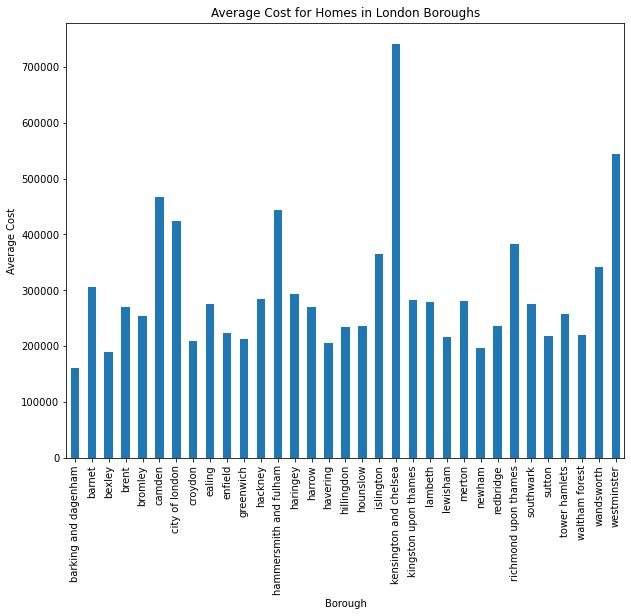

In [16]:
plt.figure(figsize = (10,8))
price_borough.plot.bar()
ax = price_borough.plot.bar(x='area')
plt.title('Average Cost for Homes in London Boroughs')
plt.xlabel('Borough')
plt.ylabel('Average Cost')

In [17]:
# sorting the data from largest to smallest to identify boroughs having higher and lower average prices
prices_sorted = price_borough.sort_values(ascending = False).to_frame().round(2)
prices_sorted

,average_price
area,
kensington and chelsea,742060.37
westminster,543865.94
camden,467500.91
hammersmith and fulham,443791.86
city of london,423942.58
richmond upon thames,382615.96
islington,365187.72
wandsworth,342304.20
barnet,304991.09


### Average Home Prices In and Outside London

Let's see how the home prices in London compare to prices in areas outside London. London is the most expensive city in England, and it is expected that home prices on average here will be higher than the average prices outside London. Let's see if our assumption will hold true or not.

In [18]:
price_outlondon = outside_london.groupby('area')['average_price'].mean()

price_outlondon.max()

314994.4219269103

The highest average price in areas outside of London is 314,994.42. The highest in London was in Kensington and Chelsea, where it was 742,060.37 as seen in the section before. I will now plot the two data and see the difference between the prices in and out of London

In [19]:
#Getting mean prices for both locations throughout the years
price_year_borough = boroughs.groupby('year')['average_price'].mean()
price_year_outside = outside_london.groupby('year')['average_price'].mean()

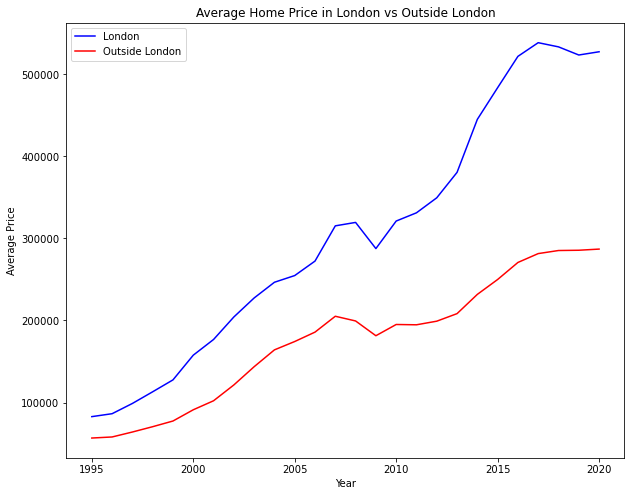

In [20]:
plt.figure(figsize = (10,8))

price_year_borough.plot(y = 'average_price', color = 'blue', label = 'London')
price_year_outside.plot(y = 'average_price', color = 'red', label = 'Outside London')
plt.title('Average Home Price in London vs Outside London')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.legend(loc='best')
plt.show()

My assumption holds true. We can see that the Average Price in London has always been higher than outside London. We notice that the difference between the prices has been growing. While the prices outside London has been growing at a steady pace, the prices in London has been growing dramatically.

### Average Price throughout the Years

The data spans a period of 25 years. It starts with the data from 1995 and ends with 2020.

In [21]:
# Seeing the first and last dates we have.
print(monthly['date'].head(1))
print(monthly['date'].tail(1))

0   1995-01-01
Name: date, dtype: datetime64[ns]
13548   2020-01-01
Name: date, dtype: datetime64[ns]


Home prices in London have increased significantly from 1995. The average in 1995 was 82,833.18 and it has risen to 527,450.39 in 2020. The prices have raised continuously until 2017, except in 2009, when it fell to 287,613.12 as compared to the year prior when it was at 319,500.30.The prices peaked in 2017, when it was at 538,511.11. It slightly declined in 2018 and declined further in 2019 until starting to rise again in 2020. We know that the last date that we have is 1 January, 2020.The average for 2020 does not paint a true picture of what happened during that year. It'd be especially interesting to look at the data for this whole year considering this was the year the pandemic began. Data for 2020 and 2021 could reveal what housing trends look like during events such as the pandemic. The UK withdrew from the EU in January 31, 2020 so it would also be interesting to see whether it impacted, and if so, what kind of impact it had on home prices.

In [22]:
# London Average Prices from 1995-2020
price_year_borough.round(2)

year
1995     82833.18
1996     86407.50
1997     98900.82
1998    113129.25
1999    127621.41
2000    157719.48
2001    176844.42
2002    204275.63
2003    227436.41
2004    246573.45
2005    254749.66
2006    272385.96
2007    315322.94
2008    319500.30
2009    287613.12
2010    321173.43
2011    331210.01
2012    349505.15
2013    380493.69
2014    445082.82
2015    483686.64
2016    521855.35
2017    538511.11
2018    533415.53
2019    523498.93
2020    527450.39
Name: average_price, dtype: float64

The average prices outside London increased from 56,759.64 in 1995 to 286,998.83 in 2020. As with the prices in London, we notice prices fall in 2009 which is interesting. Perhaps this happened during the great recession that occured during 2007 to 2009.

In [23]:
# Average prices outside London from 1995-2020
price_year_outside.round(2)

year
1995     56759.64
1996     58057.03
1997     64091.56
1998     70583.46
1999     77501.77
2000     91194.34
2001    102174.17
2002    121457.25
2003    143673.20
2004    164190.72
2005    174367.85
2006    185825.28
2007    205152.97
2008    199420.33
2009    181427.28
2010    195119.93
2011    194744.26
2012    199146.48
2013    208353.22
2014    231803.72
2015    249947.12
2016    270714.52
2017    281515.47
2018    285259.83
2019    285590.40
2020    286998.83
Name: average_price, dtype: float64

## Houses Sold

### In London

The total number of houses sold seems to be changing frequently. We notice frequent increases and subsequent declines. It seemss that more houses were sold in the period before 2009. The houses sold declines in 2009 and after which could potentiall be an effect on the Great Recession.

In [24]:
# Houses Sold throughout the years
sale_year_borough = boroughs.groupby('year')['houses_sold'].sum().round()
sale_year_borough

year
1995    106850.0
1996    137270.0
1997    154343.0
1998    148100.0
1999    169076.0
2000    149269.0
2001    162744.0
2002    173993.0
2003    153784.0
2004    163797.0
2005    136836.0
2006    171450.0
2007    165571.0
2008     80921.0
2009     75231.0
2010     91933.0
2011     90041.0
2012     93859.0
2013    111973.0
2014    121949.0
2015    116572.0
2016    104758.0
2017     96009.0
2018     89769.0
2019    142443.0
2020     71226.0
Name: houses_sold, dtype: float64

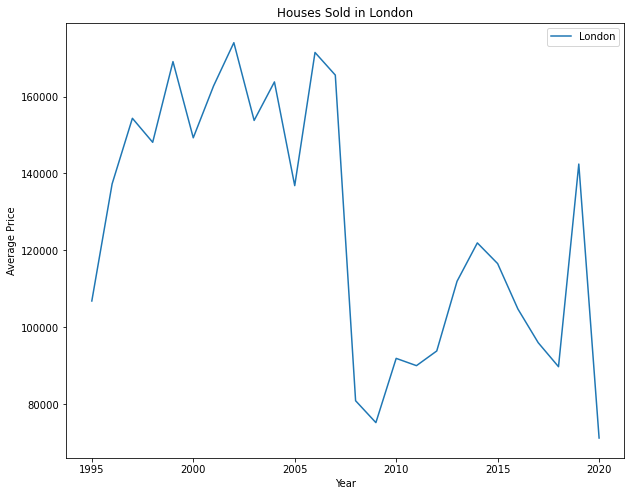

In [25]:
#Plotting the data
plt.figure(figsize = (10,8))

sale_year_borough.plot(y = 'houses_sold', label = 'London')
plt.title('Houses Sold in London')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.legend(loc='best')
plt.show()

Wandsworth, Bromley, and Croydon seem like a popular residential location as they have the highest number of houses sold. The most expensive locations, Kensington and Chelsea, and Camden are lower down the list, which is to be expected. It is interesting that although Westminster was the third most expensive, it still has a very high number of houses being sold.


In [26]:
# Seeing which borough had the highest total houses sold
sale_borough =  boroughs.groupby('area')['houses_sold'].sum().round()
s_borough = sale_borough.sort_values(ascending = False).to_frame().round(2)
s_borough

,houses_sold
area,
wandsworth,168188.0
bromley,152833.0
croydon,150223.0
barnet,137965.0
lambeth,122270.0
enfield,121724.0
ealing,114359.0
lewisham,112440.0
westminster,111011.0


Text(0, 0.5, 'Borough')

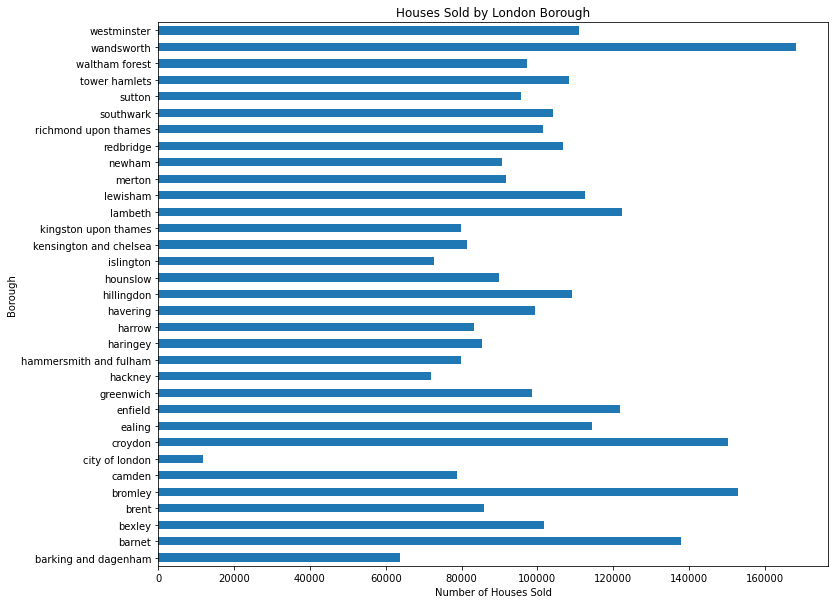

In [27]:
# plotting the houses sold according to the borough
plt.figure(figsize = (12,10))
sale_borough.plot.barh()
plt.title('Houses Sold by London Borough')
plt.xlabel('Number of Houses Sold')
plt.ylabel('Borough')

<AxesSubplot:title={'center':'Relationship between Houses Sold and Average Price'}, xlabel='houses_sold', ylabel='average_price'>

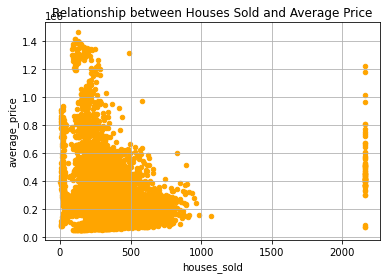

In [28]:
# Plotting the relationship between houses sold and average price in London Boroughs
boroughs.plot(kind= "scatter",
y= "average_price", x= "houses_sold", color = 'orange',
title = "Relationship between Houses Sold and Average Price",
grid= True)

### Outside London

As expected, the number of houses sold is a lot higher outside London than within London. It is not surprising that a city's total home sales was lower than the rest of country. According to Statista, the total number of housing dwellings in London was around 3.6 million while the whole country's was 24.7 million as of 2020.

In [29]:
#Getting total houses sold outside London from 1995-2020
sale_year_england = outside_london.groupby('year')['houses_sold'].sum().round()
sale_year_england

year
1995    1610104.0
1996    1953425.0
1997    2215713.0
1998    2129574.0
1999    2427932.0
2000    2265911.0
2001    2499078.0
2002    2701307.0
2003    2500094.0
2004    2548419.0
2005    2132500.0
2006    2669610.0
2007    2561935.0
2008    1296097.0
2009    1252857.0
2010    1344937.0
2011    1340695.0
2012    1362931.0
2013    1632107.0
2014    1924377.0
2015    1906738.0
2016    1884080.0
2017    1848947.0
2018    1754480.0
2019    1527061.0
2020      25900.0
Name: houses_sold, dtype: float64

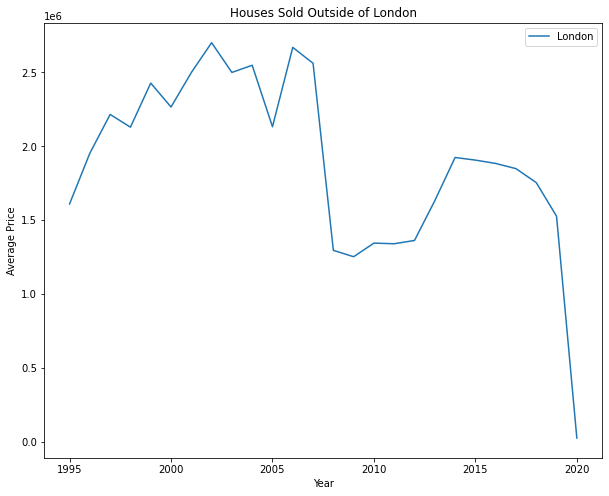

In [30]:
#plotting the data
plt.figure(figsize = (10,8))

sale_year_england.plot(y = 'houses_sold', label = 'London')
plt.title('Houses Sold Outside of London')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.legend(loc='best')
plt.show()

## Number of  Crimes in London Boroughs

Let's take a look at the number of crimes in London Boroughs. The highest average number of crimes are in Westminster while the least are in Kingston upon Thames. Westminter ranked 2nd highest in terms of price. Despite the high crime rate, it seems that Westminster continues to be an area favored as a residential location, and the crimes don't seem to impact the cost of houses. Camden had the third highest crime rate and it ranked 3rd in terms of average prices as well. This suggests that there the crimes committed are higher where homes cost more. I will plot the relationship to check whether this is true or not. 

It also seems that the number of houses sold increases as number of crimes go down. I will create a plot to check this as well

In [31]:
# Number of Crimes in London Boroughs, sorted largest to smallest
crimes_boroughs = boroughs.groupby('area')['no_of_crimes'].mean().sort_values(ascending = False).to_frame().round(2)
crimes_boroughs

,no_of_crimes
area,
westminster,4542.01
lambeth,2906.50
camden,2841.72
southwark,2820.41
newham,2685.65
croydon,2534.64
ealing,2499.73
hackney,2474.86
tower hamlets,2449.46


<AxesSubplot:title={'center':'Relationship Average Price and Number of Crimes'}, xlabel='no_of_crimes', ylabel='average_price'>

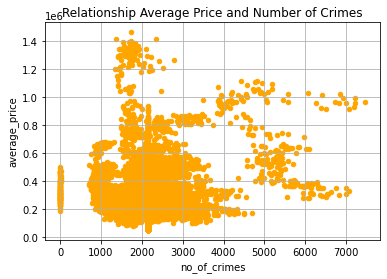

In [32]:
# Plot of relationship between average price and number of crimes
boroughs.plot(kind= "scatter",
y= "average_price", x= "no_of_crimes",
color= "orange",
title = "Relationship Average Price and Number of Crimes",
grid= True)


<AxesSubplot:title={'center':'Relationship Houses Sold and Number of Crimes'}, xlabel='houses_sold', ylabel='no_of_crimes'>

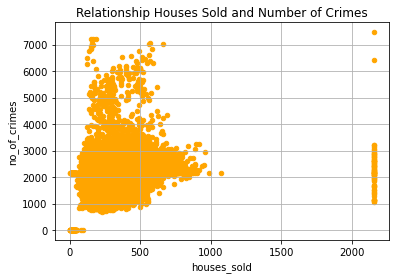

In [33]:
# Plot of relationship between houses sold and number of crimes.
boroughs.plot(kind= "scatter",
y= "no_of_crimes", x= "houses_sold",
color= "orange",
title = "Relationship Houses Sold and Number of Crimes",
grid= True)


I will now create a heatmap to see the correlations between the variables in the monthly dataframe.

In [34]:
correl = monthly.corr()
np.triu(np.ones(monthly.shape)).astype(np.bool)
df_lts = correl.where(np.triu(np.ones(correl.shape)).astype(np.bool))

<ipython-input-34-6489d2caa652>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(monthly.shape)).astype(np.bool)
<ipython-input-34-6489d2caa652>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lts = correl.where(np.triu(np.ones(correl.shape)).astype(np.bool))


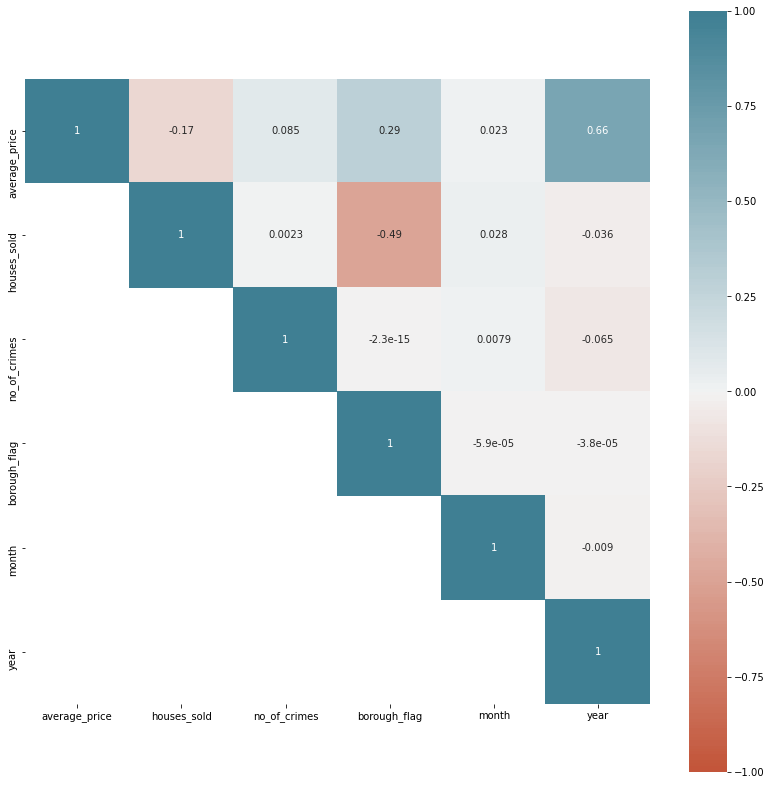

In [35]:
plt.figure(figsize=(14, 14))
hmap=sns.heatmap(df_lts, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                square=True, annot = True)


hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)

## Additional Analysis

Now I will take a look at the yearly dataframe to see if I can find any interesting discoveries.

In [36]:
#Starting by looking at the details of the data
yearly.info()
yearly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [37]:
#Converting date to datetime object
yearly['date'] = pd.to_datetime(yearly['date'], format= '%Y-%m-%d')

yearly['year'] = pd.to_datetime(yearly['date']).dt.year

In [38]:
#Replacing special symbols that randomly show up in data
yearly.replace(['#','na','-','' ], np.nan, inplace=True)

In [39]:
#Mean Salary and Recycling Percentage have been stored as object. I will convert them to a float type.
yearly['mean_salary'] = yearly['mean_salary'].astype(float)
yearly['recycling_pct'] = yearly['recycling_pct'].astype(float)

In [40]:
#Checking for null values
yearly.isnull().sum()

code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary           17
recycling_pct        212
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
year                   0
dtype: int64

In [41]:
# Filling null values with the mean.
medsalary_mean = yearly['median_salary'].mean()
yearly.fillna(value = medsalary_mean, inplace=True)

lifesatisfaction_mean = yearly['life_satisfaction'].mean()
yearly.fillna(value = houses_sold_mean, inplace=True)

recpct_mean = yearly['recycling_pct'].mean()
yearly.fillna(value = recpct_mean, inplace=True)

popsize_mean = yearly['population_size'].mean()
yearly.fillna(value = popsize_mean, inplace=True)

jobs_mean = yearly['number_of_jobs'].mean()
yearly.fillna(value = jobs_mean, inplace=True)

areasize_mean = yearly['area_size'].mean()
yearly.fillna(value = areasize_mean, inplace=True)
medsalary_mean = yearly['median_salary'].mean()
yearly.fillna(value = medsalary_mean, inplace=True)

nohouses_mean = yearly['no_of_houses'].mean()
yearly.fillna(value = nohouses_mean, inplace=True)

np.triu(np.ones(yearly.shape)).astype(np.bool)
df_lt = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))

I will now create a correlation heatmap to see if there is any correlation between the variables.

plt.figure(figsize=(14, 14))
hmap=sns.heatmap(df_lt, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                square=True, annot = True)


hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)

In [42]:
corr = yearly.corr()
np.triu(np.ones(yearly.shape)).astype(np.bool)
df_lt = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))

<ipython-input-42-541c6f9499eb>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(yearly.shape)).astype(np.bool)
<ipython-input-42-541c6f9499eb>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))


There seems to be correlations between quite a few variables. We can see that there is a correlation between the mean and median salary, population size and the number of jobs, number of houses and area size, year and median salary etc.

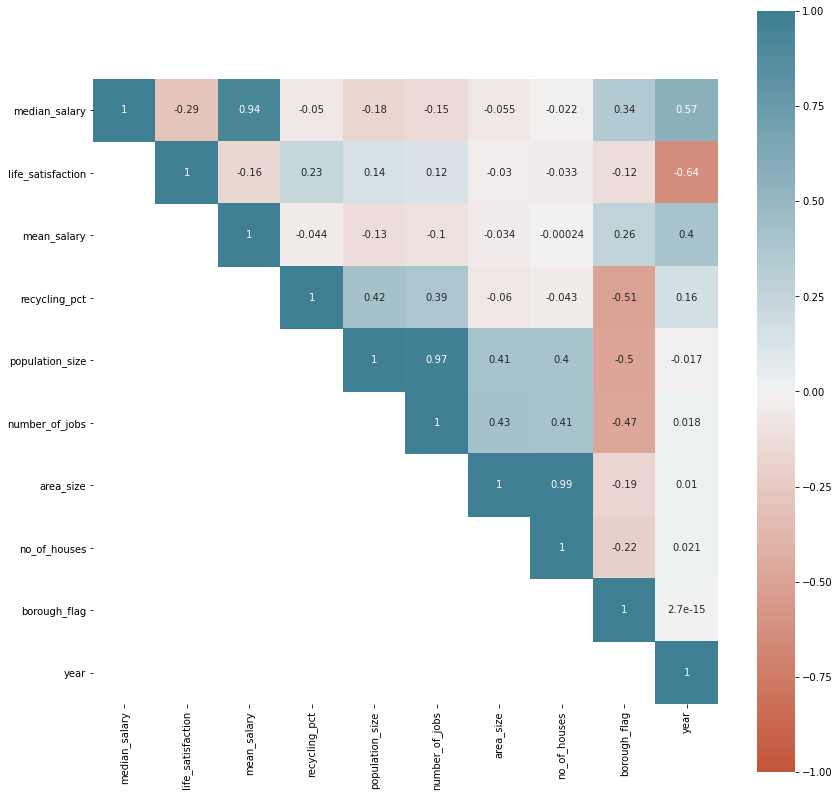

In [43]:
plt.figure(figsize=(14, 14))
hmap=sns.heatmap(df_lt, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                square=True, annot = True)


hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)

## Conclusion

In this paper, I looked at different variables to see how they affected the housing market in London as well as outside of it. I was able to determine which locations were more expensive, which were more popular, which had more crime, as well as look at the relationship between other variables such as salary, population, area size.

It was interesting seeing the trends that I noticed during 2009, the time during the Great Recession. Seeing how housing trends responded was quite insightful.

I was surpised to see how popular Westminster was. Despite of high crime and high prices, people still seem to want to buy a home in that borough.

For the future, I believe that analyzing 2020 and 2021 data would be very useful. Also, combining the two dataframes (monthly and yearly), and looking at the correlation between average price, and variables like salary, and life_satisfaction would be a great way of conducting further analysis.

## References

#### Dataset: 
Housing in London (Kaggle) https://www.kaggle.com/datasets/justinas/housing-in-london

#### Code:

<a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html">Creating Horizontal Bar Chart</a>

<a href="https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset">Finding % of missing values in each column</a>

<a href="https://www.statology.org/pandas-unique-values-in-column/">Pandas Unique Values in column</a>

<a href="https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/">Ways to filter pandas dataframe by column values</a>

<a href="https://stackoverflow.com/questions/13452410/creating-hyperlinks-in-python"> Creating hyperlinks in python </a>


#### Essay:
<a href="https://www.statista.com/statistics/232302/number-of-dwellings-in-england/"> Number of Dwellings in England </a>

<a href="https://www.statista.com/statistics/585272/number-of-dwellings-london-uk/#:~:text=In%202020%2C%20the%20capital%20city,of%20approximately%203.6%20million%20dwellings."> Number of dwellings in London </a>

<a href="https://www.montcalm.co.uk/blog/what-every-london-borough-is-the-best-and-worst-at/"> What every London borough is the best and worst at </a>